# Wine Quality Classification
#### Johannes Lehner 103854

###  This project, classifies Wine into 3 Classifications in order to their quality. The Dataset contains 11 Features about chemical ingredients. And the Feature about the quality which is the dependend variable.

##### Independend variable:
##### 1 - fixed acidity
##### 2 - volatile acidity
##### 3 - citric acid
##### 4 - residual sugar
##### 5 - chlorides
##### 6 - free sulfur dioxide
##### 7 - total sulfur dioxide
##### 8 - density
##### 9 - pH
##### 10 - sulphates
##### 11 - alcohol
##### 
##### Dependend variable:
##### 12 - quality

##### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

### Imports 

In [160]:
# import pandas as pd ,numpy as np, MinMaxScaler, and train_test_split for data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as and seaborn as sns for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import RandomForestClassifier and SupportVectorClassifier for model building 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import accuracy score, confusion matrix and classification report for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Data Understanding

In [161]:
# import th dataset with read_csv and store it in a dataframe df
df = pd.read_csv(r"C:\Users\Johannes\Desktop\Masterstudium\Python_Advanced\WineQT.csv")
# give the first 5 rows of the df back
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [162]:
#check the shape of the df
df.shape

(1143, 13)

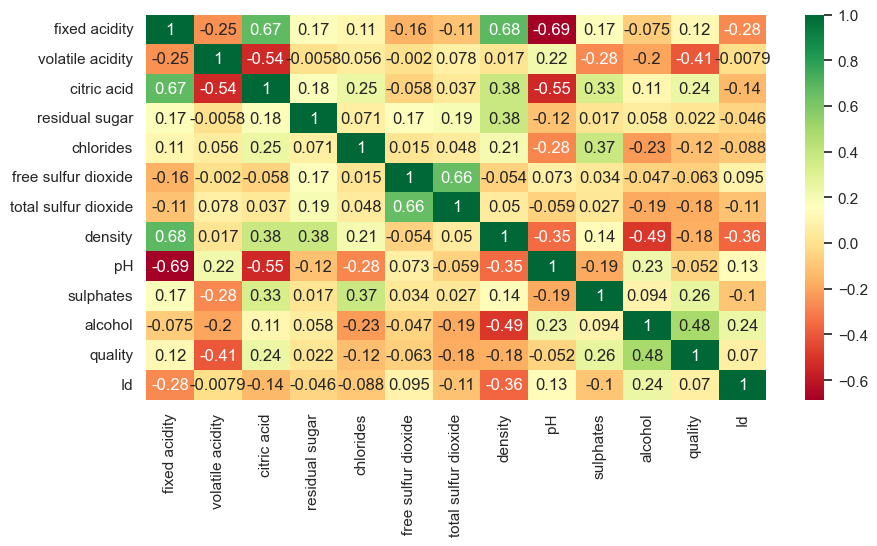

In [163]:
# create and plot the correlation matrix of the df
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

sns.set(rc={'figure.figsize':(15,8)})



#### As you can see in the Correlationmatrix, the correlation is mostly near 0 or negativ.

### Data Preprocessing 

#### The Quality is classified in 6 different Classes from 3 to 8. Because the accuracy with this dataset ist very low if you use 6 different classes its getting merged into 3 classen. Also is for my own opinion the choice between 3 classes on picking wine far enough.
#### 1 = bad
#### 2 = ok
#### 3 = good

In [164]:
#show all values, which quality has
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [165]:
# merge the 6 classes of quality into 3 classes of quality using apply and lambda function
# 1 = bad, 2 = medium, 3 = good
# 1 = 3-4, 2 = 5-6, 3 = 7-8
df['quality'] = df['quality'].apply(lambda x: 1 if x <= 4 else (2 if x > 4 and x <= 6 else 3))
# show all values, of the new quality column
df['quality'].unique()

array([2, 3, 1], dtype=int64)

In [166]:
# check if there are any missing values in the df
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [167]:
#check if there is any 0 value in the df
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [168]:
# check the number of unique values in each column
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    3
Id                      1143
dtype: int64

#### As you can see die column 'Id' hast always a different value. What is the purpose of the Id but makes it harder to classify. Because of that, the column 'Id' is getting dropped.

In [169]:
# drop 'Id' column from the df
df.drop('Id', axis=1, inplace=True)

#### Identify outliers

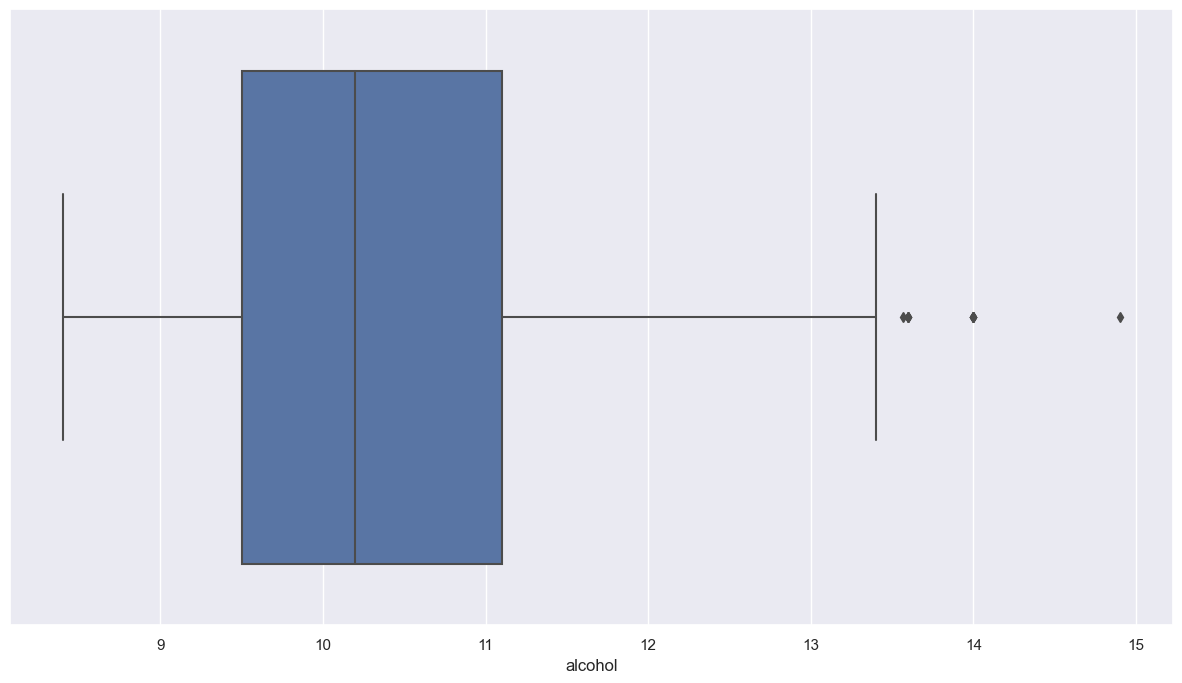

In [170]:
# create a boxplot of the feature 'alcohol' to check for outliers
sns.boxplot(x=df['alcohol'])
sns.set(rc={'figure.figsize':(10,5)})

##### as you can see it has a view Outliers between the values 13,5 and 15

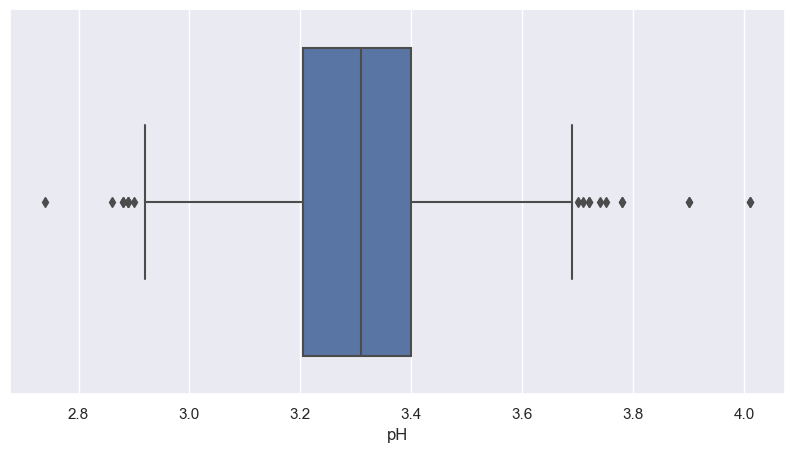

In [171]:
# create a boxplot of the feature 'density' to check for outliers
sns.boxplot(x=df['pH'])
sns.set(rc={'figure.figsize':(10,5)})


##### As you can see it hast outliers on the left between 2,7 and 2,9 and on the right side between 3,7 and 4,01

#### Now the boxplot showed us that the columns have Outliers now it`s getting checked more accordingly with the Skewness value.

In [172]:
# use the lambda function to check for outliers in the df with the skewness value if its not between -1 and 1
df.apply(lambda x: print('Skewness value of', x.name + ':', x.skew()) if x.skew()>1 or x.skew()<-1 else None)

Skewness value of fixed acidity: 1.0449299563724053
Skewness value of residual sugar: 4.361096404323471
Skewness value of chlorides: 6.026360154399587
Skewness value of free sulfur dioxide: 1.2312611567075427
Skewness value of total sulfur dioxide: 1.6657660141342994
Skewness value of sulphates: 2.497266051332364


fixed acidity           None
volatile acidity        None
citric acid             None
residual sugar          None
chlorides               None
free sulfur dioxide     None
total sulfur dioxide    None
density                 None
pH                      None
sulphates               None
alcohol                 None
quality                 None
dtype: object

#### The skewness value is in some features very bad. So all feautures which got printed the outliers getting dropped.

In [173]:
# safe all columns with a skewness value > 1 or < -1 in a list
cols = ['fixed acidity','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

# definer lower and upper quantile
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
# calculate the interquartile range 
IQR = Q3 - Q1
# drop outliers with the IQR method 
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# show the shape of the df
df.shape

(881, 12)

#### Split the df into x, y and train, test 

In [174]:
# use the train_test_split function to split the df into train and test data and store it in x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(df.drop(['quality'], axis=1), df['quality'], test_size=0.30, random_state=10)

# use min_max_scaler to scale the data between 0 and 1
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# fit and transform the x_train and x_test data with the min_max_scaler
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)


## Modelling

### Random Forest Classifier

#### Random Forest is a powerful and flexible classifier that is widely used due to its accuracy, versatility, and ability to handle a variety of data types and problem domains. It is very popular for classification problems.

In [175]:
# create a RandomForestClassifier model with 20 trees and a random state of 17 and safe it in rfc
rfc = RandomForestClassifier(n_estimators= 20,random_state=10)

# fit the model
rfc.fit(x_train, y_train) 

# Predict the test set results
y_pred_rfc = rfc.predict(x_test) 


# Check accuracy score of the model for fast evaluation
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy : ', accuracy_score(y_test, y_pred_rfc))

Accuracy :  0.8566037735849057


#### Random Forest Classifier Evaluation

In [176]:
# Create the confusion matrix of the rfc model
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# print the confusion matrix
print("Confusion Matrix:")
print(cm_rfc)

Confusion Matrix:
[[  0   6   0]
 [  1 214   6]
 [  0  25  13]]


In [177]:
# create a classification report of the rfc model with zero_division=1 to avoid division by zero because of the first class
report_rfc = classification_report(y_test, y_pred_rfc,zero_division=1)

# print the classification report
print(report_rfc)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.87      0.97      0.92       221
           3       0.68      0.34      0.46        38

    accuracy                           0.86       265
   macro avg       0.52      0.44      0.46       265
weighted avg       0.83      0.86      0.83       265



### Suport Vector Classifier

#### SVMs are powerful classifiers that can handle high-dimensional data, non-linear relationships, and perform well with small to moderate-sized datasets. They have a solid theoretical foundation and can effectively handle both balanced and imbalanced datasets.

In [178]:
# Create an instance of SVC using c=1.0, kernel='poly'and random_state=10
svc = SVC(C=1.0, kernel='poly',random_state=10)

# fit the model
svc.fit(x_train, y_train)

# Predict the labels for the test set
y_pred_svc = svc.predict(x_test)

# Calculate the accuracy of the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy:", accuracy_svc)


Accuracy: 0.8867924528301887


#### Support Vector Classifier Evaluation

In [179]:
# Create the confusion matrix of the svc model
cm_svc = confusion_matrix(y_test, y_pred_svc)

# print the confusion matrix
print("Confusion Matrix:")
print(cm_svc)

Confusion Matrix:
[[  0   6   0]
 [  1 215   5]
 [  0  18  20]]


In [180]:
# create a classification report of the svc model with zero_division=1 to avoid division by zero because of the first class
report_svc = classification_report(y_test, y_pred_rfc,zero_division=1)

# print the classification report
print(report_svc)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.87      0.97      0.92       221
           3       0.68      0.34      0.46        38

    accuracy                           0.86       265
   macro avg       0.52      0.44      0.46       265
weighted avg       0.83      0.86      0.83       265



### Conclusion

#### In This project the wine got classified into 3 classes about the quality based on chemical ingedients. First of all the Classification accuracy is in both models acceptable. The Randon Forest Classifier has an accuracy of 0.86 and the Support Vector Classifier has an accuracy of 0.89. As you can see in the confusion matrix the class 2 - ok was classified very good and often. The class 1 - bad wasnt prediced once right. The third class was just predicted with a precision of 0.68. Class 2 - good, was predicted very well. Overall the accuracy is that high, because the most samples fit into class 2 so that the other classes have minor import in the algorithm. For better prediction it would need more Trainingdata or maybe feature extraction.